# Matlotlib Tips

在数据分析过程中可视化数据十分重要,通过可视化数据去定位问题直至解决问题,这是一个又科学又有依据的过程.比起盲目寻求解决方案显得更加又条理,在python可视化的方案中,matlotlib使用最为广泛,例如显示变量的影响程度,图片的显示,混淆矩阵等等都可以使用该库去完成,所以从该库入手,由问题驱动学习.

当前主要实施的功能有:
1. 图像显示
2. 混淆矩阵
3. 一张画幅显示多张图

## 1. 图像显示

In [3]:
import torch
import numpy as np
import PIL as pil
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
# 下面的cat是PIL.Image.Image类型,可以直接在cell显示
cat = pil.Image.open('img/jiujiu.png').convert("RGB")
# 转成numpy的图片,像素点取值范围[0-255]
cat_numpy = np.array(cat)
transform = transforms.Compose([
    # 这个操作它降像素点除以了255
    transforms.ToTensor(),
])

def show_img(img,name='test'):
    """显示torch和numpy的图片

    Args:
        img (numpy or tensor): 图片
        name (str, optional): 标题. Defaults to test.

    Raises:
        ValueError: shape error
    """
    if len(img.shape) != 3:
        # 有batch处理不了
        raise ValueError("img.shape == 3")
    if img.shape[-1] != 3 and img.ndim ==3:
        # 若是torch处理过的则做一个转换
        img = np.array(img)
        img = np.transpose(img,[1,2,0])
    if name:
        plt.title(name)
    plt.imshow(img)

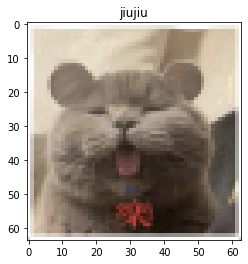

In [15]:
# 显示numpy的图片
show_img(cat_numpy,'jiujiu')

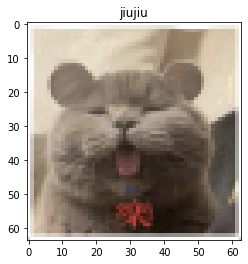

In [16]:
# 显示torch的图片
cat = transform(cat_numpy)
show_img(cat,'jiujiu')

## 2. 混淆矩阵

混淆矩阵图片保存在:img/测试混淆矩阵.png
混淆矩阵图片保存在:img/测试混淆矩阵.png


array([[2, 0, 0],
       [1, 0, 0],
       [0, 1, 1]])

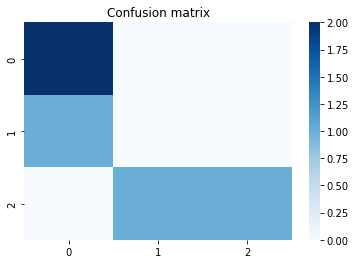

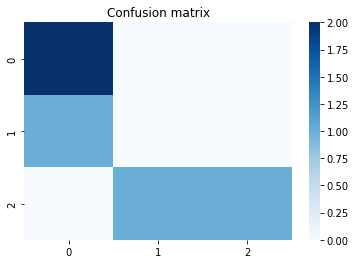

In [38]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from typing import Union


def get_confusion_matrix(y: Union[np.ndarray, list], y_pred: Union[np.ndarray, list], img_name: str):
    """获取混淆矩阵

    Args:
        y (Union[np.ndarray, list]): 真实值
        y_pred (Union[np.ndarray, list]): 预测值
        img_name (str): 标题

    Returns:
        np.ndarray: 混淆矩阵
    """
    y = np.array(y)
    y_pred = np.array(y_pred)
    # 将one-hot做转换
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    if len(y_pred.shape) == 2:
        y_pred = np.argmax(y_pred, axis=1)
    cf_matrix = confusion_matrix(y, y_pred)
    plt.figure()
    plt.title("Confusion matrix")
    sns_plot = sns.heatmap(cf_matrix, cmap='Blues')
    sns_plot.get_figure().savefig(img_name+'.png')
    print('混淆矩阵图片保存在:{}'.format(img_name+'.png'))
    return cf_matrix


get_confusion_matrix([0,1,2,0,2],[0,0,1,0,2],'img/测试混淆矩阵')

y_pred = np.eye(10)[[0, 0, 1, 0, 2]]
get_confusion_matrix([0,1,2,0,2],y_pred,'img/测试混淆矩阵')

## 3. 一张画幅显示多张图


(5, 64, 63, 3)


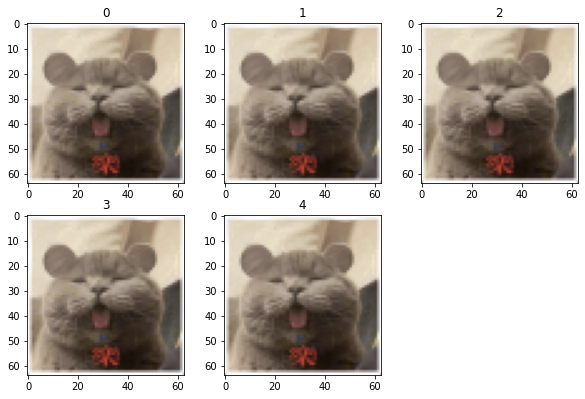

In [19]:
import torch
import numpy as np
import PIL as pil
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
def show_multi_img(imgs:np.ndarray,figsize=(10,5)):
    """显示多张照片
    """
    plt.figure(figsize=figsize)
    show_num = imgs.shape[0]
    row_num = int((show_num-1)**0.5)+1
    for i in range(show_num):
        plt.subplot(row_num,row_num,i+1),plt.title(str(i))
        img = imgs[i]
        if len(img.shape) != 3:
            # 有batch处理不了
            raise ValueError("img.shape == 3")
        if img.shape[-1] != 3 and img.ndim == 3:
            # 若是torch处理过的则做一个转换
            img = np.array(img)
            img = np.transpose(img, [1, 2, 0])
        plt.imshow(img)


cat = pil.Image.open('img/jiujiu.png').convert("RGB")
cat = np.array(cat)
multi_cat = np.array([cat, cat, cat, cat, cat])
print(multi_cat.shape)
show_multi_img(multi_cat,figsize=(10,10))